## Evaluate performance

In [1]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('best_model_max.keras')

In [2]:
commands = ['_background_noise_', 'backward', 'down', 'eight', 'five',
       'follow', 'forward', 'four', 'go', 'left', 'max', 'nine', 'no',
       'off', 'on', 'one', 'right', 'seven', 'six', 'stop', 'three',
       'tree', 'two', 'up', 'yes', 'zero']

import sklearn as sk
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(commands)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [3]:
!pip install SpeechRecognition
!pip install pyaudio

In [4]:
import speech_recognition as sr
import os
import numpy as np
import scipy
from scipy import io
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [5]:
def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate /1e3)) # 窗口中采样点的个数
    noverlap = int(round(step_size * sample_rate /1e3))
    freqs, times, spec = scipy.signal.spectrogram(audio, fs=sample_rate, window='hann', nperseg=nperseg, noverlap=noverlap, detrend=False)

    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [6]:
def get_specgram(file_path):
    sample_rate, signal = scipy.io.wavfile.read(file_path)
    signal_padding = np.zeros((16000,))
    #统一输入音频文件长度，当音频文件大于1秒时切尾，当音频长度小于1秒时补零signal_padding np. zeros((16000,))
    if len(signal)>=16000:
        signal_padding = signal[:16000]
    else:
        signal_padding[:len(signal)] = signal
    
    #获取频谱
    _, _, specgram = log_specgram(signal_padding, sample_rate=sample_rate) 
    return specgram

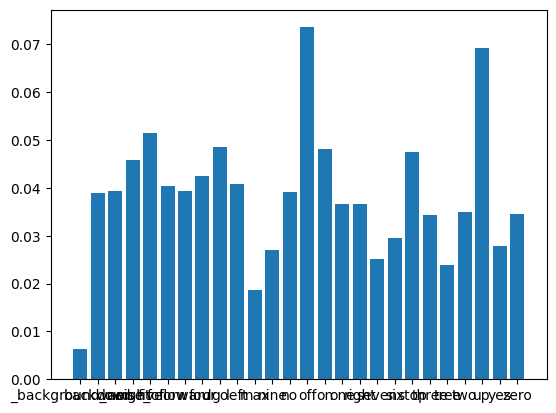

Say something! 
 ['_background_noise_', 'backward', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'left', 'max', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'six', 'stop', 'three', 'tree', 'two', 'up', 'yes', 'zero']


KeyboardInterrupt: 

In [8]:
%matplotlib inline

r = sr.Recognizer()

with sr.Microphone(sample_rate=16000) as source:
    while True:
        r.adjust_for_ambient_noise(source)
        if r.energy_threshold < 200:
            r.energy_threshold= 200

        print(f"Say something! \n {commands}")
        
        audio =r.listen(source)
        with open("microphone-results.wav", "wb") as f:
            f.write(audio.get_wav_data())
        
        if os.path.isfile('microphone-results.wav'):
            result = loaded_model.predict(get_specgram('microphone-results.wav').reshape(-1,99, 161))
            y_pred=np.argmax(result)
            data=result.reshape(26) 
            clear_output(wait=True)
            fig=plt.figure()
            plt.bar(commands, data)
            plt.show()
            # os.remove('microphone-results.wav')
        else:
            print('File not exist')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


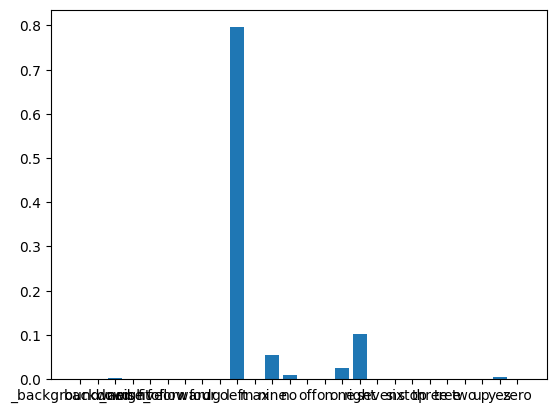

In [10]:
result = loaded_model.predict(get_specgram('trigger_example/max_16khz_central.wav').reshape(-1,99, 161))
data=result.reshape(26) 
plt.bar(commands, data)
plt.show()